<div width=50% style="display: block; margin: auto">
    <img src="figures/ucl-logo.svg" width=100%>
</div>

### [UCL-ELEC0136 Data Acquisition and Processing Systems 2024]()
University College London
# Lab 3: Data Processing #1


In this lab, we will use the _open-meteo_ API (https://open-meteo.com/), to acquire historical weather data for London from the past 2 years, inspect it, and prepare it for modelling.

### Objectives
* Learn to deal with **time series**
* Learn to **plot** and represent data
* **Normalise** your data
* Detect and handle **outliers** in time series

### Constraints
* You cannot use pre-existing functions to normalise your data or calculate statistics about it.
* This includes functions from `scipy`, `pandas` and other statistics library.
* This doesn't mean you cannot use `pandas`, but that you cannot use its stats functions (e.g., functions to calculate percentile)
* You must you `numpy` only to manipulate your data
* All data must be acquired through Python: you cannot download the data by browsing to the website and using the mouse 

<hr width=70% style="float: left">

### TASKS

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 1: Acquiring data</h4>

* Create a function `acquire_data(latitude, longitude, start_date, end_date, features)` that acquires **daily** data for **London** between the **1st January 1950** and the **31st December 1954** (included)
* We are interested in the following **features**:
  * Mean Temperature (2 m)
  * Minimum Temperature (2 m)
  * Maximum Temperature (2 m)
  * Precipitation Sum
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use a WEB request to acquire the data (like for lab 1), the API endpoint is https://archive-api.open-meteo.com/v1/archive
* Take a look at the open-meteo docs https://open-meteo.com/en/docs/historical-weather-api to see which parameters to use
* Always specify a timezone (you can use `timezone=GMT`)

</div>


In [180]:
from typing import List
import requests
import json
import pandas as pd

# create a function
def acquire_data(latitude: float, longitude: float, start_date: str, end_date: str, features: List[str]) -> dict:
    """
    Acquires data from the Open-meteo API for a given location and time period.
    The API endpoint is https://archive-api.open-meteo.com/v1/archive.

    Args:
        latitude (float): latitude of the location
        longitude (float): longitude of the location
        start_date (str): start date of the data in the format YYYY-MM-DD
        end_date (str): end date of the data in the format YYYY-MM-DD
        features (List[str]): list of features to be extracted from the API
    Returns:
        (dict): dictionary of data
    """

    # add your code here
    # before the ? is the true api, after ? is the parameters requests
    # latitude and longitude of London: 51.509865, -0.118092
    url = "https://archive-api.open-meteo.com/v1/archive/"

    features = ",".join(features)
    params = {
        'latitude':latitude,
        'longitude':longitude,
        'start_date':start_date,
        'end_date':end_date,
        'daily':features,
        'timezone':'GMT'
    }

    response = requests.get(url, params=params)
    repos = response.json()
    print(response.status_code)
    print(repos)
    return repos


<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 2: Handling data</h4>

* Run the function above to acquire the data
* Create a pandas dataframe from the acquired data
</div>

In [181]:
# add your code here
london_latitude = 51.5072
london_longitude = 0.1276
start_date = '1950-01-01'
end_date = '1954-12-31'
features = ['temperature_2m_mean','temperature_2m_max','temperature_2m_min','precipitation_sum']

repos = acquire_data(london_latitude,london_longitude, start_date, end_date, features)
# print(repos["daily"])
df = pd.DataFrame(repos["daily"])
# can also use https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html
# dataframe.pop: drop it and get the item
print(df)

200
{'latitude': 51.5, 'longitude': 0.1000061, 'generationtime_ms': 1.824021339416504, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 3.0, 'daily_units': {'time': 'iso8601', 'temperature_2m_mean': '°C', 'temperature_2m_max': '°C', 'temperature_2m_min': '°C', 'precipitation_sum': 'mm'}, 'daily': {'time': ['1950-01-01', '1950-01-02', '1950-01-03', '1950-01-04', '1950-01-05', '1950-01-06', '1950-01-07', '1950-01-08', '1950-01-09', '1950-01-10', '1950-01-11', '1950-01-12', '1950-01-13', '1950-01-14', '1950-01-15', '1950-01-16', '1950-01-17', '1950-01-18', '1950-01-19', '1950-01-20', '1950-01-21', '1950-01-22', '1950-01-23', '1950-01-24', '1950-01-25', '1950-01-26', '1950-01-27', '1950-01-28', '1950-01-29', '1950-01-30', '1950-01-31', '1950-02-01', '1950-02-02', '1950-02-03', '1950-02-04', '1950-02-05', '1950-02-06', '1950-02-07', '1950-02-08', '1950-02-09', '1950-02-10', '1950-02-11', '1950-02-12', '1950-02-13', '1950-02-14', '1950-02-15', '1950-02

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 3: Plot your data</h4>

* Create a function `lineplot(x, y, title, x_label, y_label)` that creates a lineplot for the feature named `feature_name` and returns both the `Figure` and the `Axis` objects
* The function must return both the matplotlib `figure` object and the `axis` object
* Use the function to create two images containing plots of both the temperature and precipitations and save them to disk
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Use `matplotlib` to create the plots
* Use the appropriate type of plot for the data that you want to visualise
* For example, you can use a lineplot to plot the average temperature
* Or, you can use a candlestick plot a shaded areaplot to plot min, max, and average temperature in the same figure

</div>


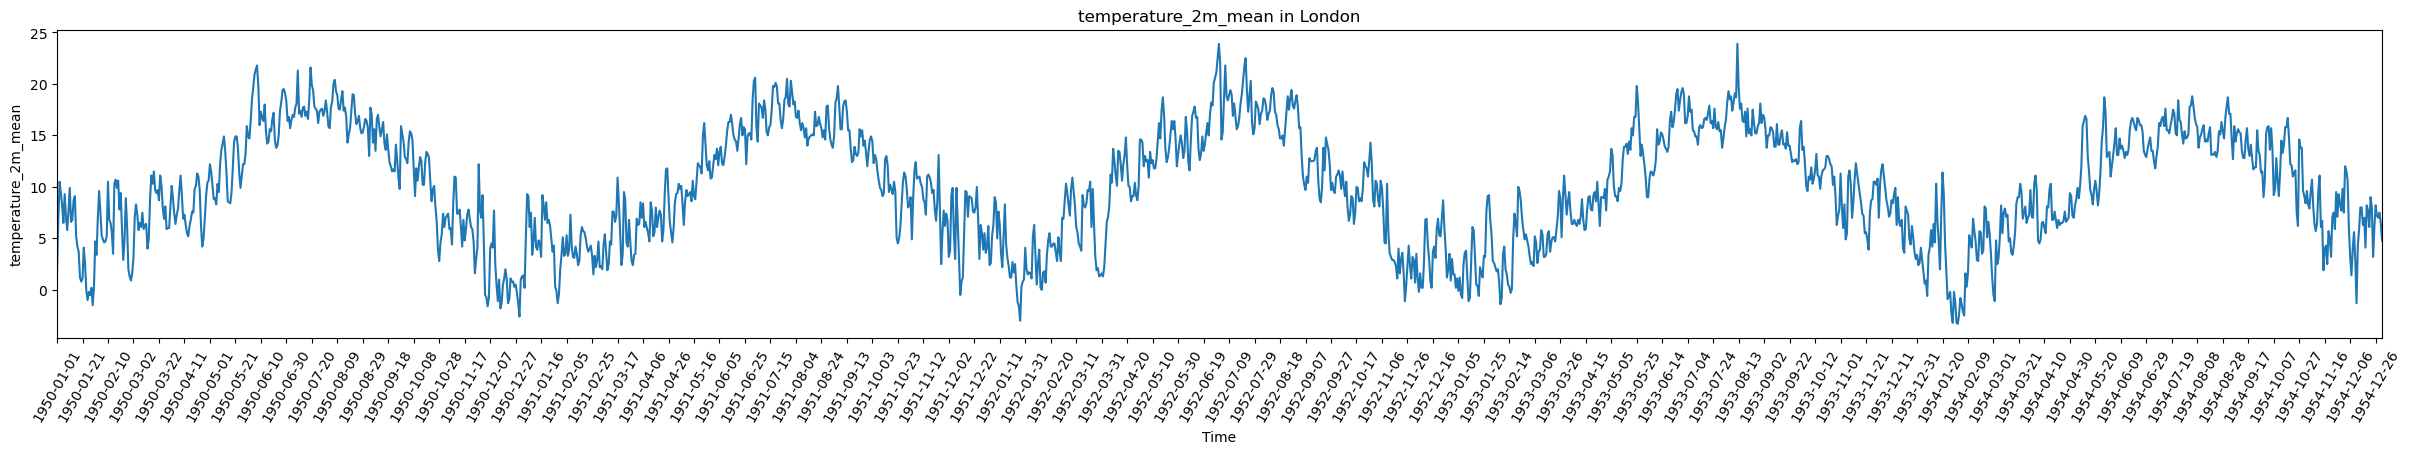

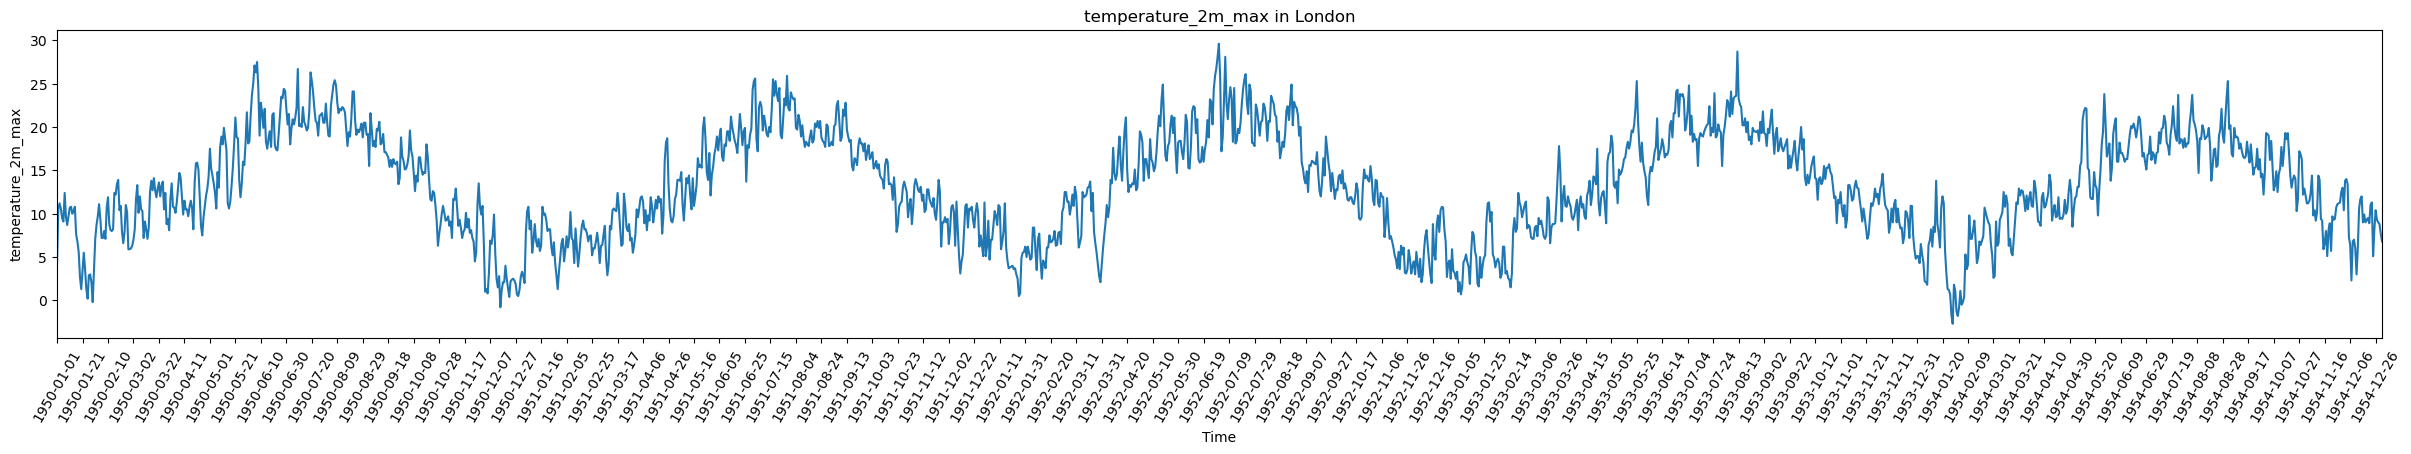

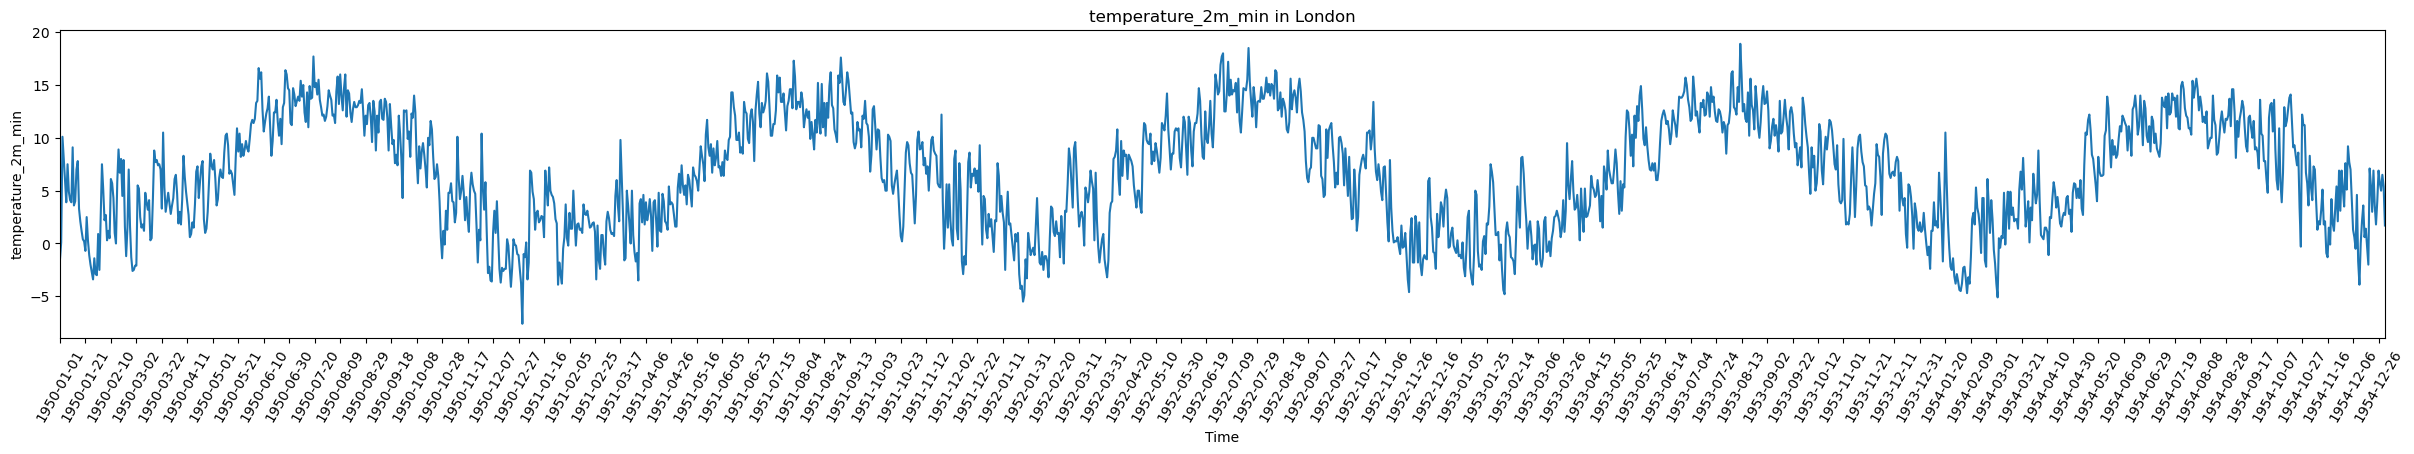

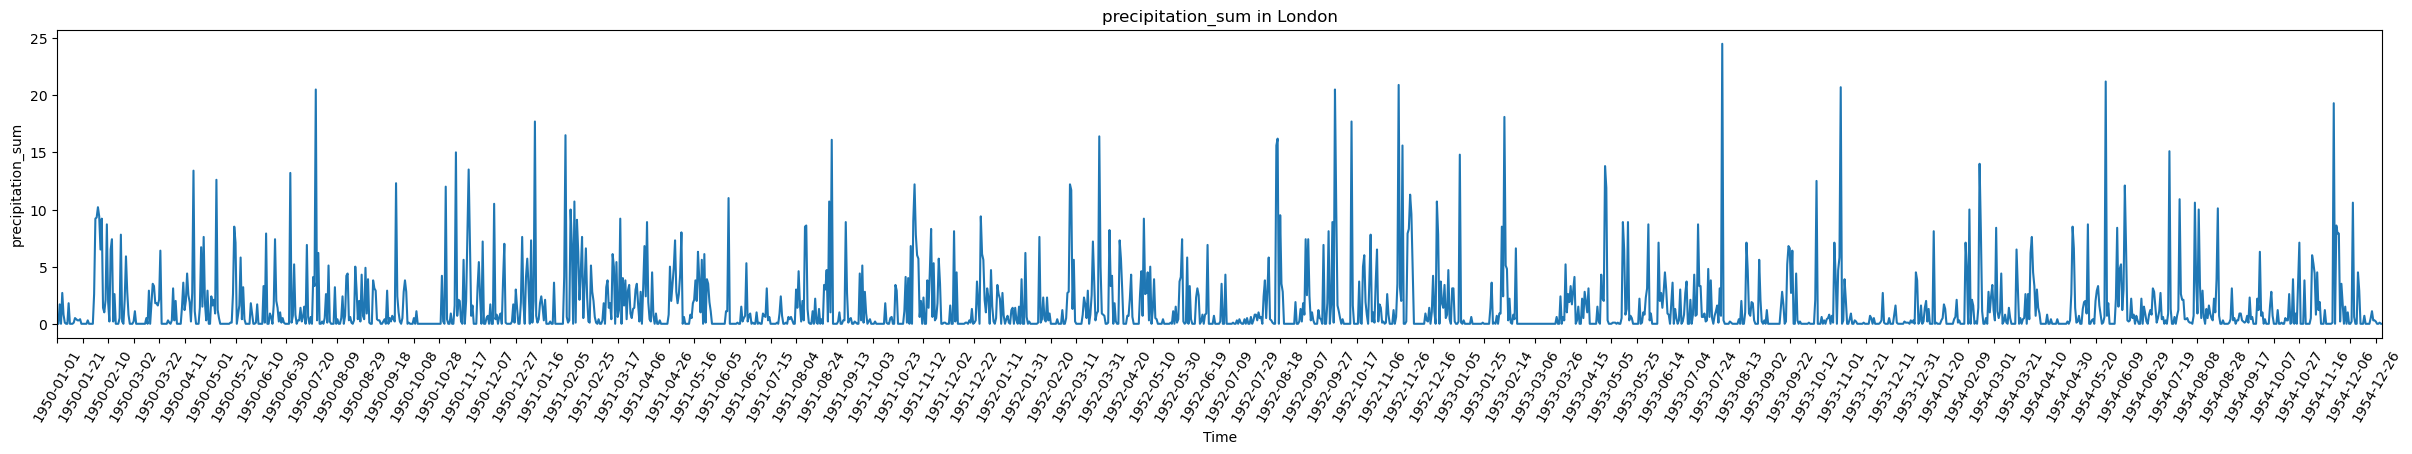

In [182]:
from numpy.typing import ArrayLike
import matplotlib.pyplot as plt


def lineplot(x: ArrayLike, y: ArrayLike, title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for the given data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        y (ArrayLike): value of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30,4))
    ax.plot(x,y)
    ax.margins(x=0)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20],x[::20],rotation=60)  # ticks and labels

    return fig,ax

for i in range(1,5):
    x = df['time']
    y = df[df.columns[i]]
    title = df.columns[i] + " in London"
    x_label = "Time"
    y_label = df.columns[i]
    fig,ax = lineplot(x,y,title,x_label,y_label)

plt.show()

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.1: multivariate plots</h4>

* Create a function `lineplots(x, ys, title, x_label, y_label, legend)` that plot the two variables on the same graph and returns both the `Figure` and the `Axis` objects
* Add a legend
</div>

      temperature_2m_mean  temperature_2m_max  temperature_2m_min  \
0                     1.5                 4.2                -1.6   
1                     6.8                10.5                 0.1   
2                    10.5                11.2                10.1   
3                     9.4                10.6                 8.1   
4                     8.2                 9.5                 6.0   
...                   ...                 ...                 ...   
1821                  7.2                 9.3                 5.7   
1822                  7.0                 9.0                 5.0   
1823                  7.5                 8.8                 6.5   
1824                  6.5                 7.7                 5.4   
1825                  4.8                 6.8                 1.7   

      precipitation_sum  
0                   0.0  
1                   0.0  
2                   1.7  
3                   0.0  
4                   2.7  
...            

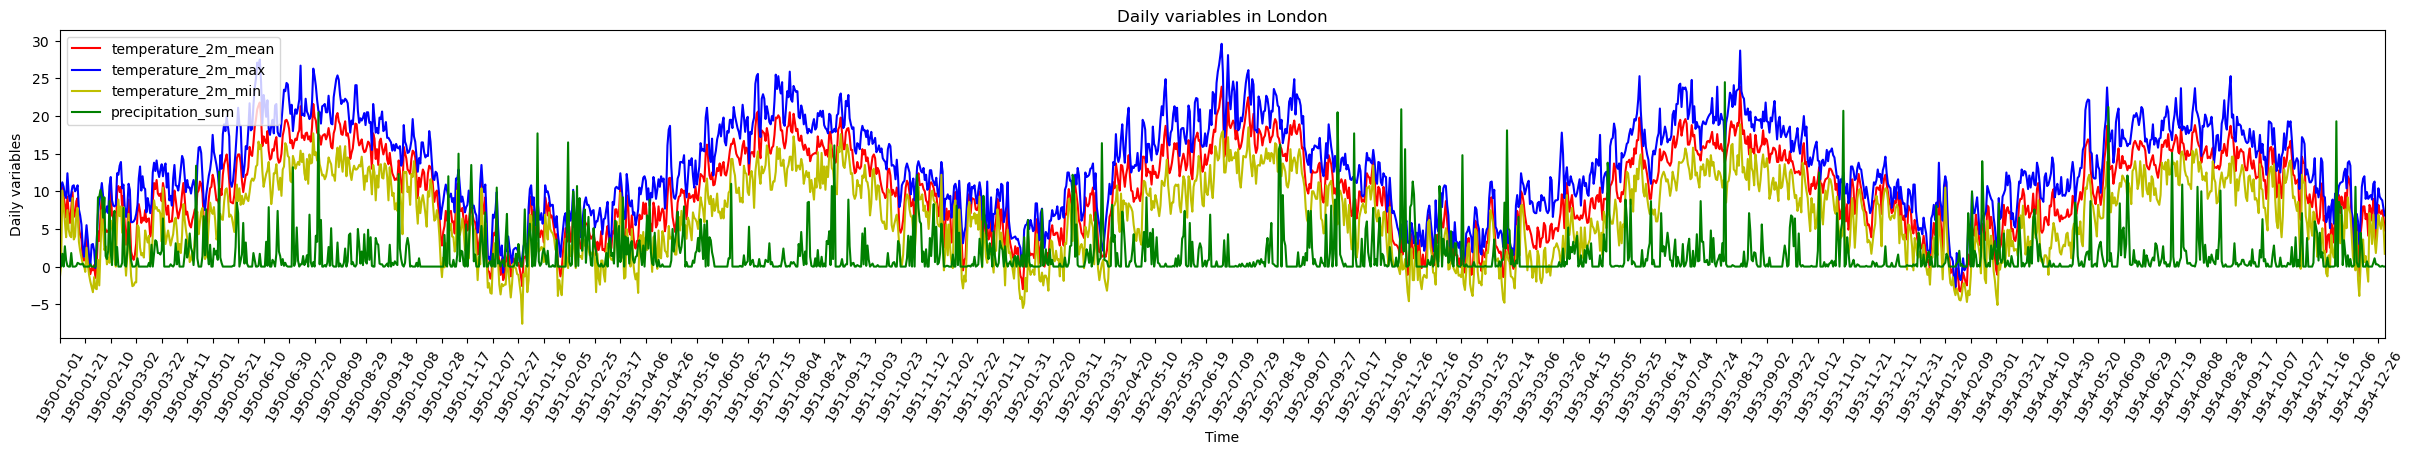

In [183]:
def lineplots(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str, legend: List[str]) -> (plt.Figure, plt.Axes):
    """
    Creates a line plot for each list of data in the given list of data, title and labels.

    Args:
        x (ArrayLike): value of the data on the x-axis
        ys (List[ArrayLike]): list of values of the data on the y-axis
        title (str): title of the plot
        x_label (str): x-axis label
        y_label (str): y-axis label
        legend (List[str]): list of legend labels
    Returns:
        (plt.Figure, plt.Axes): matplotlib figure and axes objects
    """
    # add your code here
    fig, ax = plt.subplots(1, figsize=(30,4))
    colors = ['r','b','y','g']
    print(ys)
    for (y,color) in zip(ys.columns,colors):
        ax.plot(x,ys[y],color=color)
    ax.margins(x=0)

    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20],x[::20],rotation=60)  # ticks and labels
    ax.legend(legend)

    return fig,ax

x = df['time']
ys = df.iloc[:,1:5]
title = "Daily variables in London"
x_label = "Time"
y_label = "Daily variables"
legend = df.columns[1:5]
fig,ax = lineplots(x,ys,title,x_label,y_label,legend)

    
    

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 3.2: Plot with additional statistics</h4>

* Create a shaded area plot, where the mean temperature is the central line, and the minimum, and the maximum are the lower and upper bounds of the shaded area.
* The function should return both the `Figure` and the `Axis` objects
* The shaded area must be 0.3 opacity
* See https://swdevnotes.com/python/2020/display-line-chart-range/ for an example output
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can modify existing plots by reusing the `axis`
* For example, running `ax.plot` on an axis that already contains another plot, adds a plot on top of it

</div>


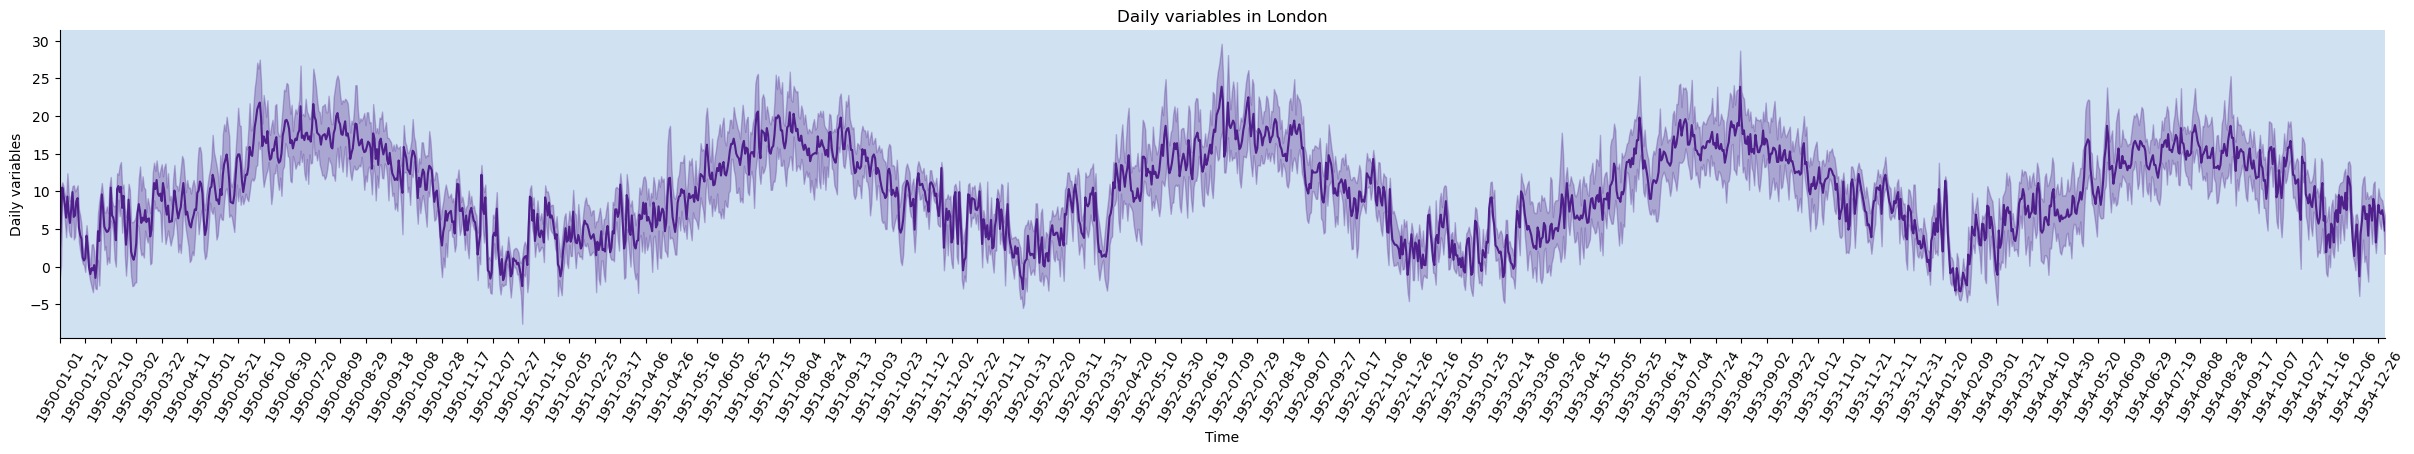

In [184]:
# add your code here
def lineplots_filled(x: ArrayLike, ys: List[ArrayLike], title: str, x_label: str, y_label: str) -> (plt.Figure, plt.Axes):
    
    fig, ax = plt.subplots(1, figsize=(30,4))
    ax.margins(x=0)

   
    clr = plt.cm.Purples(0.9)
    ax.set_facecolor(plt.cm.Blues(.2))
    y_l = ys[ys.columns[2]]
    y_m = ys[ys.columns[0]]
    y_u = ys[ys.columns[1]]
    ax.plot(x, y_m, label = 'Median', color = clr)
    ax.fill_between(x, y_l, y_u, alpha=0.3, edgecolor=clr, facecolor=clr)
    
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20],x[::20],rotation=60)  # ticks and labels
    ax.spines['right'].set_visible(False)  # boundary line
    ax.spines['top'].set_visible(False)

    return fig,ax

x = df['time']
ys = df.iloc[:,1:5]
title = "Daily variables in London"
x_label = "Time"
y_label = "Daily variables"
fig,ax = lineplots_filled(x,ys,title,x_label,y_label)

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 4: Normalising your data</h4>

* Create a function `minmax_norm(x)` that takes the acquired data, normalises the data using Min-Max normalisation only using `numpy`
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

In [185]:
import numpy as np


def minmax_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data between 0 and 1 using the min-max normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    newX = ((x-np.min(x,axis=0))/(np.max(x,axis=0)-np.min(x,axis=0)))*(1-0)+0
    return newX

newX = minmax_norm(df.iloc[:,1:5])
print(newX)

# from sklearn.preprocessing import MinMaxScaler
# minmaxscaler = MinMaxScaler()
# newX = minmaxscaler.fit_transform(df.iloc[:,1:5])
# print(newX)

      temperature_2m_mean  temperature_2m_max  temperature_2m_min  \
0                0.176471            0.213622            0.226415   
1                0.371324            0.408669            0.290566   
2                0.507353            0.430341            0.667925   
3                0.466912            0.411765            0.592453   
4                0.422794            0.377709            0.513208   
...                   ...                 ...                 ...   
1821             0.386029            0.371517            0.501887   
1822             0.378676            0.362229            0.475472   
1823             0.397059            0.356037            0.532075   
1824             0.360294            0.321981            0.490566   
1825             0.297794            0.294118            0.350943   

      precipitation_sum  
0              0.000000  
1              0.000000  
2              0.069388  
3              0.000000  
4              0.110204  
...            

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 4.1: Z-score normalisation</h4>

* Create a function `zscore_norm(x)` that takes a pandas series and normalises it using the z-score.
* The function should returns an array containing the normalised data
* Normalise the `temperature_2m_mean` feature
* Plot the normalised data over the non-normalised one in the same plot
</div>

      normalized  non-normalized
0            1.5        0.176471
1            6.8        0.371324
2           10.5        0.507353
3            9.4        0.466912
4            8.2        0.422794
...          ...             ...
1821         7.2        0.386029
1822         7.0        0.378676
1823         7.5        0.397059
1824         6.5        0.360294
1825         4.8        0.297794

[1826 rows x 2 columns]


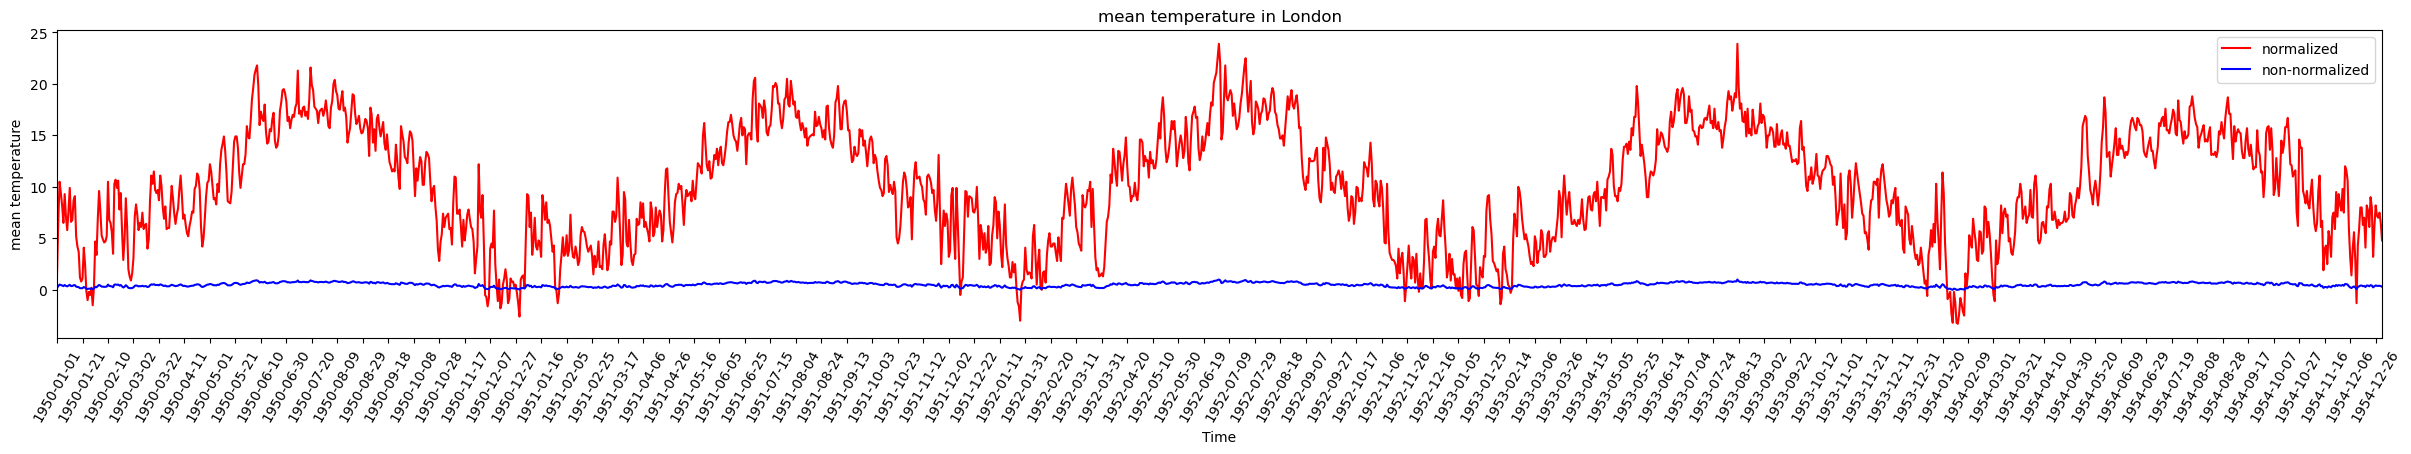

In [186]:
def zscore_norm(x: ArrayLike) -> ArrayLike:
    """
    Normalises the data using the z-score normalization.

    Args:
        x (ArrayLike): data to be normalized
    Returns:
        (ArrayLike): normalized data
    """
    # add your code here
    newX = (x-np.mean(x,axis=0))/np.std(x,axis=0)
    return newX
newX = minmax_norm(df.iloc[:,1])
# print(newX)


x = df['time']
ys = pd.concat([df.iloc[:,1],newX],axis=1)
ys.columns = ['normalized','non-normalized']
title =  "mean temperature in London"
x_label = "Time"
y_label = "mean temperature"
legend = ['normalized','non-normalized']
fig,ax = lineplots(x,ys,title,x_label,y_label,legend)

<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 5: Outliers detection</h4>

* Create a function `zscore_outliers(x, threshold=3)` that takes the acquired data, checks if each data point is an outliers by verifying that its z-score is greater than `threshold`
* The function must return the index of the outliers
* Check for outliers in `temperature_2m_mean`
</div>

In [187]:
def zscore_outliers(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Detects outliers using the z-score method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    z_score = abs((x-np.mean(x,axis=0))/np.std(x,axis=0))
    # print(z_score)
    return z_score[z_score >= threshold].index

outliers = zscore_outliers(df["temperature_2m_mean"],2)
print(outliers)

Index([  24,   28,  156,  157,  189,  199,  338,  346,  348,  349,  354,  362,
        363,  393,  754,  755,  756,  910,  911,  912,  913,  917,  932,  933,
       1058, 1108, 1133, 1319, 1487, 1488, 1490, 1491, 1492, 1493, 1495, 1496,
       1497, 1521, 1805],
      dtype='int64')


<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.1: Plotting outliers</h4>

* Create a function `mark_outliers(ax, idx)` that marks the outliers with a red dot
* The function should return the `Figure` and the `Axis` object containing the plot
* Plot the data with the marked outliers
</div>

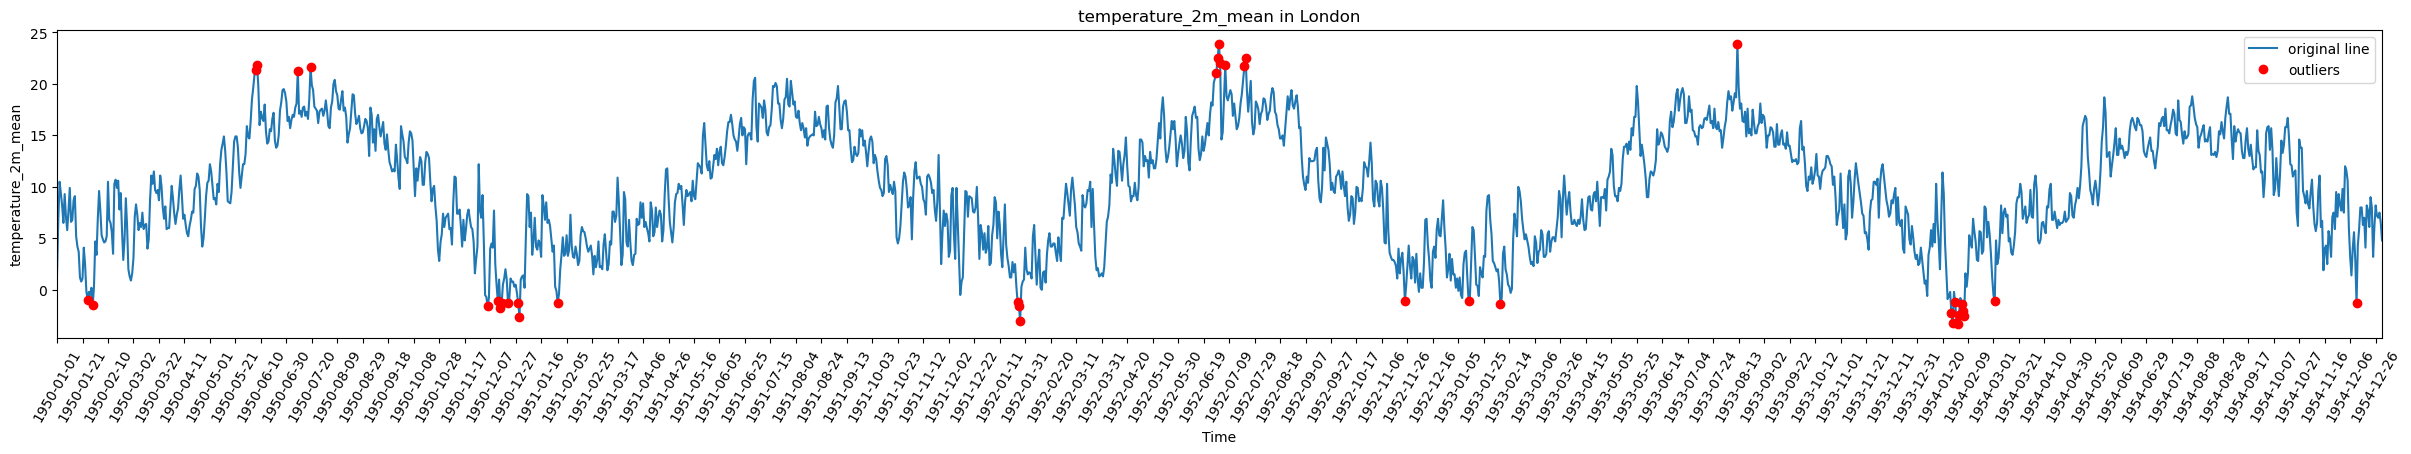

In [188]:
def mark_outliers(ax: plt.Axes, x: ArrayLike, y: ArrayLike, outliers_idx: ArrayLike) -> plt.Axes:
    """
    Plots red circles around the outliers in a certain line plot.

    Args:
        ax (plt.Axis): the older axis to plot on that contains the original line plot
        x (ArrayLike): the x-data for the line plot
        y (ArrayLike): the y-data for the line plot
        outliers_idx (ArrayLike): indices of the outliers
    """
    # add your code here

    ax.plot(x[outliers_idx],y[outliers_idx],'or')


    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(x[::20],x[::20],rotation=60)  # ticks and labels
    ax.legend(legend)

    return fig,ax


x = df['time']
y = df[df.columns[1]]
title = df.columns[1] + " in London"
x_label = "Time"
y_label = df.columns[1]
legend = ["original line","outliers"]
fig,ax = lineplot(x,y,title,x_label,y_label)
fig,ax = mark_outliers(ax,x,y,outliers)
    

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 5.3: Detect outliers using the IQR method </h4>

* Create a function `iqr_detect(x, threshold=1.5)` that returns the indices of the outliers in the original data according to the **IQR** method
* Plot the data with the marked outliers
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can use `np.quantile` to get the quantile of a uniform, discrete distrbution

</div>


Index([1488, 1491, 1492, 912, 1319], dtype='int64')


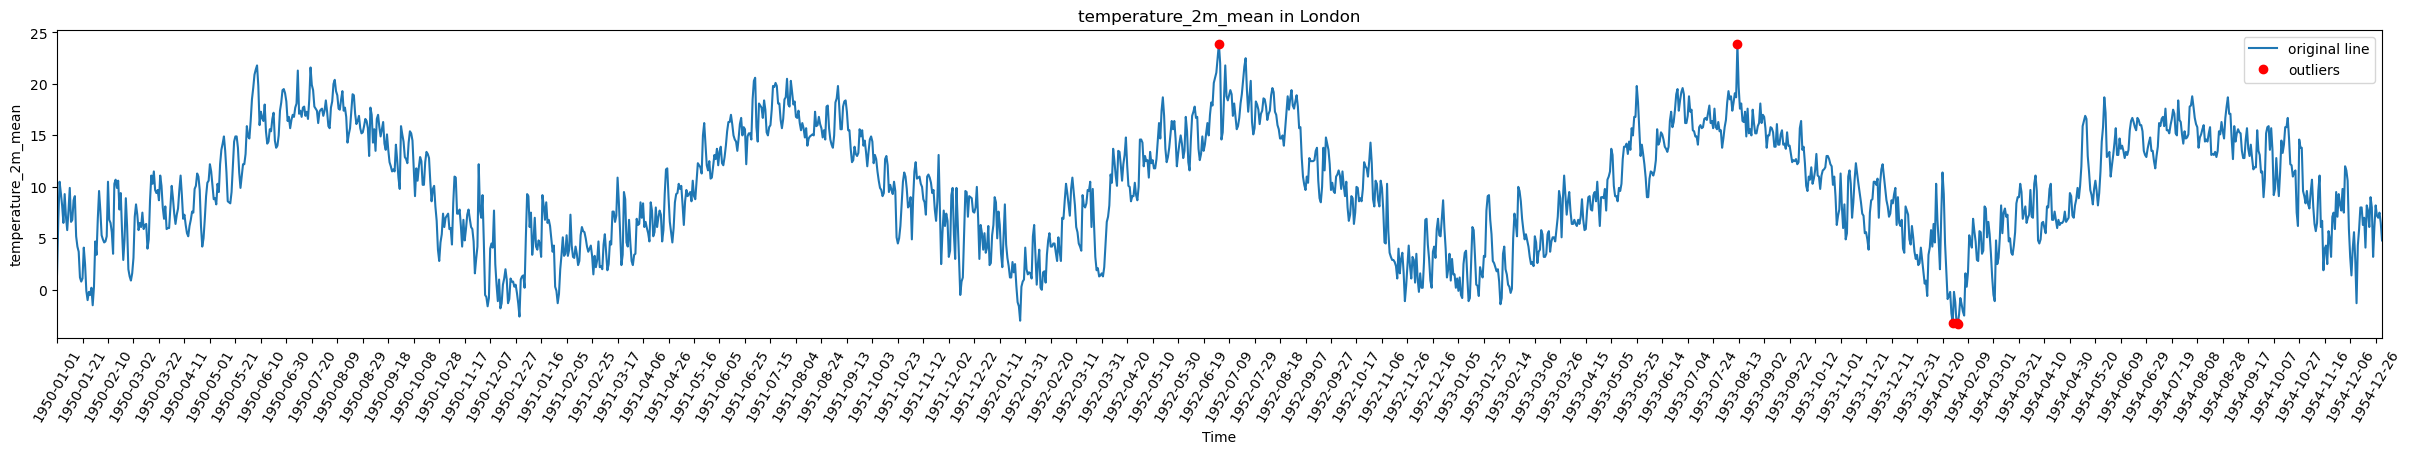

In [189]:
def iqr_detect(x: ArrayLike, threshold: float=1.5) -> ArrayLike:
    """
    Detects outliers using the interquantile range method and returns the indices of the outliers.

    Args:
        x (ArrayLike): data to be checked for outliers
        threshold (float): threshold for the interquantile range method

    Returns:
        (ArrayLike): indices of the outliers
    """
    # add your code here
    Q1 = np.quantile(x,0.25,axis=0)
    Q3 = np.quantile(x,0.75,axis=0)
    IQR = Q3-Q1
    return x[x<(Q1-threshold*IQR)].index.append(x[x>(Q3+threshold*IQR)].index)

outliers = iqr_detect(df["temperature_2m_mean"],1)
print(outliers)
x = df['time']
y = df[df.columns[1]]
title = df.columns[1] + " in London"
x_label = "Time"
y_label = df.columns[1]
legend = ["original line","outliers"]
fig,ax = lineplot(x,y,title,x_label,y_label)
fig,ax = mark_outliers(ax,x,y,outliers)
    



<div class="alert alert-block alert-danger">
<h4>👩‍💻👨‍💻 TASK 6: Clamping outliers</h4>

* One way to deal with outliers is to compress them into a range of acceptable values
* Create a function `zscore_clamp(x, threshold=3)` that clamps the outliers into the range between 10th percentile and 90th percentile
* The function should return a numpy array containing the clamped data
* Plot the non-clamped data over the clamped one
  
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* Not every outlier is bad!! For example in financial problems, such as stock prediction, outliers is **exactly** what you are looking for
* **Removing outliers in that case might not benefit our analysis**
* Always make an **informed** decision whether to remove outliers and always **justify** it

</div>


Index([  24,   28,  156,  157,  189,  199,  338,  346,  348,  349,  354,  362,
        363,  393,  754,  755,  756,  910,  911,  912,  913,  917,  932,  933,
       1058, 1108, 1133, 1319, 1487, 1488, 1490, 1491, 1492, 1493, 1495, 1496,
       1497, 1521, 1805],
      dtype='int64')


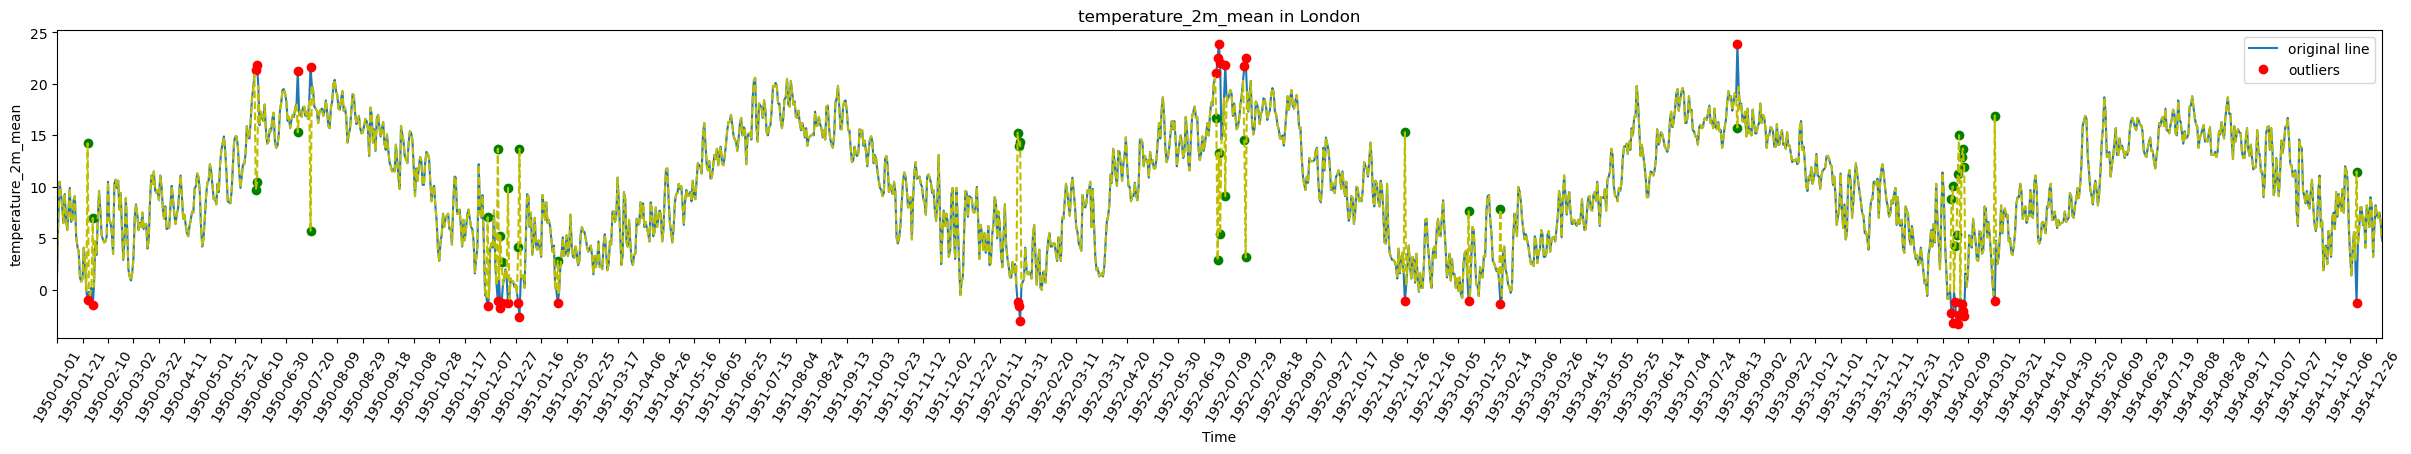

In [193]:
import random
outliers = zscore_outliers(df["temperature_2m_mean"],2)
def zscore_clamp(x: ArrayLike, threshold: int=3) -> ArrayLike:
    """
    Clamps outliers using the z-score method and returns the clamped data.

    Args:
        x (ArrayLike): data to be clamped
        threshold (int): threshold for the z-score method

    Returns:
        (ArrayLike): clamped data
    """
    # add your code here
    Q10 = np.quantile(x,0.1,axis=0)
    Q90 = np.quantile(x,0.9,axis=0)
    outliers = zscore_outliers(x,threshold)
    print(outliers)
    clamped = [random.uniform(Q10,Q90) for i in outliers]
    clamped_data = x.copy(deep=True)
    clamped_data[outliers] = clamped
    return clamped, clamped_data, outliers


x = df['time']
y = df[df.columns[1]]
title = df.columns[1] + " in London"
x_label = "Time"
y_label = df.columns[1]
legend = ["original line","outliers"]
fig,ax = lineplot(x,y,title,x_label,y_label)
clamped, clamped_data, outliers = zscore_clamp(df["temperature_2m_mean"],2)
fig,ax = mark_outliers(ax,x,y,outliers)
ax.plot(x[outliers],clamped, 'go')
ax.plot(x,clamped_data, color = 'y',linestyle="--")


    

<div class="alert alert-block alert-warning">
<h4>👩‍💻👨‍💻 [Optional] TASK 6.1: Replace outliers by n-degree interpolation </h4>

* Create a function `zscore_interp(x, time, threshold=3, deg=3)` that replaces the z-score outliers with values from a polynomial fit on clean data
* The function should return a numpy array containing the interpolated data
* Plot the data before and after replacing outliers
* Experiment with different value of `deg`, e.g., `1`, `3`, `11`, and `23`
</div>

<div class="alert alert-heading alert-danger" style="background-color: white; border: 2px solid; border-radius: 5px; color: #000; border-color:#AAA; padding: 10px">
    <b>💎 Tip</b>

* You can index a numpy array with another numpy array of boolean values
* This will return only the values at which the index is `True`
* Try using this method to get only the clean data (that without outliers)
</div>


/Users/anlly/anaconda3/envs/daps/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/anlly/anaconda3/envs/daps/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


TypeError: copy() got an unexpected keyword argument 'deep'

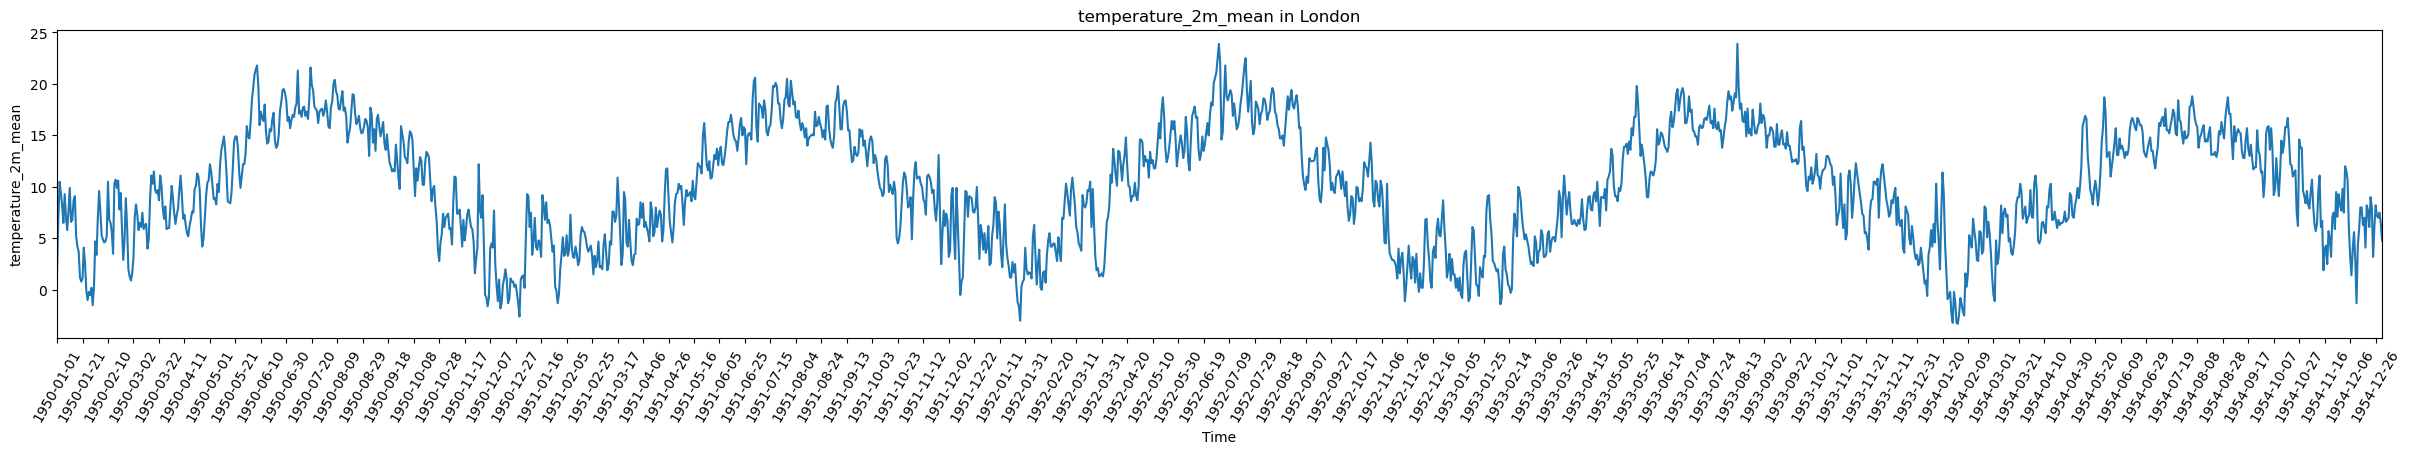

In [205]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def zscore_interp(x: ArrayLike, y: ArrayLike, threshold: int=3, deg: int=1) -> ArrayLike:
    """
    Interpolates outliers using the z-score method and returns the interpolated data using a `deg`-degree approximation.

    Args:
        x (ArrayLike): x-variate of data to be interpolated
        y (ArrayLike): y-variate of data to be interpolated
        threshold (int): threshold for the z-score method
        deg (int): degree of the polynomial approximation

    Returns:
        (ArrayLike): interpolated data
    """
    # add your code here

    outliers = zscore_outliers(x,threshold)
    x = np.array(x).reshape(-1,1)
    poly = PolynomialFeatures(degree = deg)
    features = poly.fit_transform(x)
    lin_reg = LinearRegression()
    lin_reg.fit(features,y)
    clamped = lin_reg.predict([i for index,i in enumerate(x) if index in outliers])
    clamped_data = x.copy(deep=True)
    clamped_data[outliers] = clamped
    return clamped, clamped_data, outliers

x = df['time']
y = df[df.columns[1]]
title = df.columns[1] + " in London"
x_label = "Time"
y_label = df.columns[1]
legend = ["original line","outliers"]
fig,ax = lineplot(x,y,title,x_label,y_label)
clamped, clamped_data, outliers = zscore_interp(df["temperature_2m_mean"],df["temperature_2m_mean"],2,0)
fig,ax = mark_outliers(ax,x,y,outliers)
ax.plot(x[outliers],clamped, 'go')
ax.plot(x,clamped_data, color = 'y',linestyle="--")


    

